# Resampling Techniques, Bootstrap and Blocking



## Why resampling methods ?
**Statistical analysis.**

    * Our simulations can be treated as *computer experiments*. This is particularly the case for Monte Carlo methods

    * The results can be analysed with the same statistical tools as we would use analysing experimental data.

    * As in all experiments, we are looking for expectation values and an estimate of how accurate they are, i.e., possible sources for errors.

    


## Statistical analysis
    * As in other experiments, many numerical  experiments have two classes of errors:

      * Statistical errors

      * Systematical errors


    * Statistical errors can be estimated using standard tools from statistics

    * Systematical errors are method specific and must be treated differently from case to case.

    





## Statistics, wrapping up from last week
Let us analyze the problem by splitting up the correlation term into
partial sums of the form:

$$
f_d = \frac{1}{n-d}\sum_{k=1}^{n-d}(x_k - \bar x_n)(x_{k+d} - \bar x_n)
$$

The correlation term of the error can now be rewritten in terms of
$f_d$

$$
\frac{2}{n}\sum_{k<l} (x_k - \bar x_n)(x_l - \bar x_n) =
2\sum_{d=1}^{n-1} f_d
$$

The value of $f_d$ reflects the correlation between measurements
separated by the distance $d$ in the sample samples.  Notice that for
$d=0$, $f$ is just the sample variance, $\mathrm{var}(x)$. If we divide $f_d$
by $\mathrm{var}(x)$, we arrive at the so called *autocorrelation function*

$$
\kappa_d = \frac{f_d}{\mathrm{var}(x)}
$$

which gives us a useful measure of pairwise correlations
starting always at $1$ for $d=0$.





## Statistics, final expression
The sample error can now be
written in terms of the autocorrelation function:

$$
\mathrm{err}_X^2 =
\frac{1}{n}\mathrm{var}(x)+\frac{2}{n}\cdot\mathrm{var}(x)\sum_{d=1}^{n-1}
\frac{f_d}{\mathrm{var}(x)}\nonumber
$$

$$
=
\left(1+2\sum_{d=1}^{n-1}\kappa_d\right)\frac{1}{n}\mathrm{var}(x)\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation} 
=\frac{\tau}{n}\cdot\mathrm{var}(x)
\label{_auto1} \tag{1}
\end{equation}
$$

and we see that $\mathrm{err}_X$ can be expressed in terms the
uncorrelated sample variance times a correction factor $\tau$ which
accounts for the correlation between measurements. We call this
correction factor the *autocorrelation time*:

<!-- Equation labels as ordinary links -->
<div id="eq:autocorrelation_time"></div>

$$
\begin{equation}
\tau = 1+2\sum_{d=1}^{n-1}\kappa_d
\label{eq:autocorrelation_time} \tag{2}
\end{equation}
$$

## Statistics, effective number of correlations
For a correlation free experiment, $\tau$
equals 1.

We can interpret a sequential
correlation as an effective reduction of the number of measurements by
a factor $\tau$. The effective number of measurements becomes:

$$
n_\mathrm{eff} = \frac{n}{\tau}
$$

To neglect the autocorrelation time $\tau$ will always cause our
simple uncorrelated estimate of $\mathrm{err}_X^2\approx \mathrm{var}(x)/n$ to
be less than the true sample error. The estimate of the error will be
too *good*. On the other hand, the calculation of the full
autocorrelation time poses an efficiency problem if the set of
measurements is very large.









## Can we understand this? Time Auto-correlation Function

The so-called time-displacement autocorrelation $\phi(t)$ for a quantity $\mathbf{M}$ is given by

$$
\phi(t) = \int dt' \left[\mathbf{M}(t')-\langle \mathbf{M} \rangle\right]\left[\mathbf{M}(t'+t)-\langle \mathbf{M} \rangle\right],
$$

which can be rewritten as

$$
\phi(t) = \int dt' \left[\mathbf{M}(t')\mathbf{M}(t'+t)-\langle \mathbf{M} \rangle^2\right],
$$

where $\langle \mathbf{M} \rangle$ is the average value and
$\mathbf{M}(t)$ its instantaneous value. We can discretize this function as follows, where we used our
set of computed values $\mathbf{M}(t)$ for a set of discretized times (our Monte Carlo cycles corresponding to moving all electrons?)

<!-- Equation labels as ordinary links -->
<div id="eq:phitf"></div>

$$
\phi(t)  = \frac{1}{t_{\mathrm{max}}-t}\sum_{t'=0}^{t_{\mathrm{max}}-t}\mathbf{M}(t')\mathbf{M}(t'+t)
-\frac{1}{t_{\mathrm{max}}-t}\sum_{t'=0}^{t_{\mathrm{max}}-t}\mathbf{M}(t')\times
\frac{1}{t_{\mathrm{max}}-t}\sum_{t'=0}^{t_{\mathrm{max}}-t}\mathbf{M}(t'+t).
\label{eq:phitf} \tag{3}
$$

## Time Auto-correlation Function

One should be careful with times close to $t_{\mathrm{max}}$, the upper limit of the sums 
becomes small and we end up integrating over a rather small time interval. This means that the statistical
error in $\phi(t)$ due to the random nature of the fluctuations in $\mathbf{M}(t)$ can become large.

One should therefore choose $t \ll t_{\mathrm{max}}$.

Note that the variable $\mathbf{M}$ can be any expectation values of interest.



The time-correlation function gives a measure of the correlation between the various values of the variable 
at a time $t'$ and a time $t'+t$. If we multiply the values of $\mathbf{M}$ at these two different times,
we will get a positive contribution if they are fluctuating in the same direction, or a negative value
if they fluctuate in the opposite direction. If we then integrate over time, or use the discretized version of, the time correlation function $\phi(t)$ should take a non-zero value if the fluctuations are 
correlated, else it should gradually go to zero. For times a long way apart 
the different values of $\mathbf{M}$  are most likely 
uncorrelated and $\phi(t)$ should be zero.







## Time Auto-correlation Function
We can derive the correlation time by observing that our Metropolis algorithm is based on a random
walk in the space of all  possible spin configurations. 
Our probability 
distribution function $\mathbf{\hat{w}}(t)$ after a given number of time steps $t$ could be written as

$$
\mathbf{\hat{w}}(t) = \mathbf{\hat{W}^t\hat{w}}(0),
$$

with $\mathbf{\hat{w}}(0)$ the distribution at $t=0$ and $\mathbf{\hat{W}}$ representing the 
transition probability matrix. 
We can always expand $\mathbf{\hat{w}}(0)$ in terms of the right eigenvectors of 
$\mathbf{\hat{v}}$ of $\mathbf{\hat{W}}$ as

$$
\mathbf{\hat{w}}(0)  = \sum_i\alpha_i\mathbf{\hat{v}}_i,
$$

resulting in

$$
\mathbf{\hat{w}}(t) = \mathbf{\hat{W}}^t\mathbf{\hat{w}}(0)=\mathbf{\hat{W}}^t\sum_i\alpha_i\mathbf{\hat{v}}_i=
\sum_i\lambda_i^t\alpha_i\mathbf{\hat{v}}_i,
$$

with $\lambda_i$ the $i^{\mathrm{th}}$ eigenvalue corresponding to  
the eigenvector $\mathbf{\hat{v}}_i$.







## Time Auto-correlation Function
If we assume that $\lambda_0$ is the largest eigenvector we see that in the limit $t\rightarrow \infty$,
$\mathbf{\hat{w}}(t)$ becomes proportional to the corresponding eigenvector 
$\mathbf{\hat{v}}_0$. This is our steady state or final distribution. 

We can relate this property to an observable like the mean energy.
With the probabilty $\mathbf{\hat{w}}(t)$ (which in our case is the squared trial wave function) we
can write the expectation values as

$$
\langle \mathbf{M}(t) \rangle  = \sum_{\mu} \mathbf{\hat{w}}(t)_{\mu}\mathbf{M}_{\mu},
$$

or as the scalar of a  vector product

$$
\langle \mathbf{M}(t) \rangle  = \mathbf{\hat{w}}(t)\mathbf{m},
$$

with $\mathbf{m}$ being the vector whose elements are the values of $\mathbf{M}_{\mu}$ in its 
various microstates $\mu$.





## Time Auto-correlation Function


We rewrite this relation  as

$$
\langle \mathbf{M}(t) \rangle  = \mathbf{\hat{w}}(t)\mathbf{m}=\sum_i\lambda_i^t\alpha_i\mathbf{\hat{v}}_i\mathbf{m}_i.
$$

If we define $m_i=\mathbf{\hat{v}}_i\mathbf{m}_i$ as the expectation value of
$\mathbf{M}$ in the $i^{\mathrm{th}}$ eigenstate we can rewrite the last equation as

$$
\langle \mathbf{M}(t) \rangle  = \sum_i\lambda_i^t\alpha_im_i.
$$

Since we have that in the limit $t\rightarrow \infty$ the mean value is dominated by the 
the largest eigenvalue $\lambda_0$, we can rewrite the last equation as

$$
\langle \mathbf{M}(t) \rangle  = \langle \mathbf{M}(\infty) \rangle+\sum_{i\ne 0}\lambda_i^t\alpha_im_i.
$$

We define the quantity

$$
\tau_i=-\frac{1}{log\lambda_i},
$$

and rewrite the last expectation value as

<!-- Equation labels as ordinary links -->
<div id="eq:finalmeanm"></div>

$$
\langle \mathbf{M}(t) \rangle  = \langle \mathbf{M}(\infty) \rangle+\sum_{i\ne 0}\alpha_im_ie^{-t/\tau_i}.
\label{eq:finalmeanm} \tag{4}
$$

## Time Auto-correlation Function

The quantities $\tau_i$ are the correlation times for the system. They control also the auto-correlation function 
discussed above.  The longest correlation time is obviously given by the second largest
eigenvalue $\tau_1$, which normally defines the correlation time discussed above. For large times, this is the 
only correlation time that survives. If higher eigenvalues of the transition matrix are well separated from 
$\lambda_1$ and we simulate long enough,  $\tau_1$ may well define the correlation time. 
In other cases we may not be able to extract a reliable result for $\tau_1$. 
Coming back to the time correlation function $\phi(t)$ we can present a more general definition in terms
of the mean magnetizations $ \langle \mathbf{M}(t) \rangle$. Recalling that the mean value is equal 
to $ \langle \mathbf{M}(\infty) \rangle$ we arrive at the expectation values

$$
\phi(t) =\langle \mathbf{M}(0)-\mathbf{M}(\infty)\rangle \langle \mathbf{M}(t)-\mathbf{M}(\infty)\rangle,
$$

resulting in

$$
\phi(t) =\sum_{i,j\ne 0}m_i\alpha_im_j\alpha_je^{-t/\tau_i},
$$

which is appropriate for all times.






## Correlation Time

If the correlation function decays exponentially

$$
\phi (t) \sim \exp{(-t/\tau)}
$$

then the exponential correlation time can be computed as the average

$$
\tau_{\mathrm{exp}}  =  -\langle  \frac{t}{log|\frac{\phi(t)}{\phi(0)}|} \rangle.
$$

If the decay is exponential, then

$$
\int_0^{\infty} dt \phi(t)  = \int_0^{\infty} dt \phi(0)\exp{(-t/\tau)}  = \tau \phi(0),
$$

which  suggests another measure of correlation

$$
\tau_{\mathrm{int}} = \sum_k \frac{\phi(k)}{\phi(0)},
$$

called the integrated correlation time.









## Resampling methods: Jackknife and Bootstrap

Two famous
resampling methods are the **independent bootstrap** and **the jackknife**. 

The jackknife is a special case of the independent bootstrap. Still, the jackknife was made
popular prior to the independent bootstrap. And as the popularity of
the independent bootstrap soared, new variants, such as **the dependent bootstrap**.

The Jackknife and independent bootstrap work for
independent, identically distributed random variables.
If these conditions are not
satisfied, the methods will fail.  Yet, it should be said that if the data are
independent, identically distributed, and we only want to estimate the
variance of $\overline{X}$ (which often is the case), then there is no
need for bootstrapping. 


## Resampling methods: Jackknife

The Jackknife works by making many replicas of the estimator $\widehat{\theta}$. 
The jackknife is a resampling method, we explained that this happens by scrambling the data in some way. When using the jackknife, this is done by systematically leaving out one observation from the vector of observed values $\hat{x} = (x_1,x_2,\cdots,X_n)$. 
Let $\hat{x}_i$ denote the vector

$$
\hat{x}_i = (x_1,x_2,\cdots,x_{i-1},x_{i+1},\cdots,x_n),
$$

which equals the vector $\hat{x}$ with the exception that observation
number $i$ is left out. Using this notation, define
$\widehat{\theta}_i$ to be the estimator
$\widehat{\theta}$ computed using $\vec{X}_i$. 


## Resampling methods: Jackknife estimator

To get an estimate for the bias and
standard error of $\widehat{\theta}$, use the following
estimators for each component of $\widehat{\theta}$

$$
\widehat{\mathrm{Bias}}(\widehat \theta,\theta) = (n-1)\left( - \widehat{\theta} + \frac{1}{n}\sum_{i=1}^{n} \widehat \theta_i \right) \qquad \text{and} \qquad \widehat{\sigma}^2_{\widehat{\theta} } = \frac{n-1}{n}\sum_{i=1}^{n}( \widehat{\theta}_i - \frac{1}{n}\sum_{j=1}^{n}\widehat \theta_j )^2.
$$

## Jackknife code example

In [1]:
from numpy import *
from numpy.random import randint, randn
from time import time

def jackknife(data, stat):
    n = len(data);t = zeros(n); inds = arange(n); t0 = time()
    ## 'jackknifing' by leaving out an observation for each i                                                                                                                      
    for i in range(n):
        t[i] = stat(delete(data,i) )

    # analysis                                                                                                                                                                     
    print("Runtime: %g sec" % (time()-t0)); print("Jackknife Statistics :")
    print("original           bias      std. error")
    print("%8g %14g %15g" % (stat(data),(n-1)*mean(t)/n, (n*var(t))**.5))

    return t


# Returns mean of data samples                                                                                                                                                     
def stat(data):
    return mean(data)


mu, sigma = 100, 15
datapoints = 10000
x = mu + sigma*random.randn(datapoints)
# jackknife returns the data sample                                                                                                                                                
t = jackknife(x, stat)

Runtime: 0.138923 sec
Jackknife Statistics :
original           bias      std. error
 100.123        100.113        0.150177


## Resampling methods: Bootstrap
Bootstrapping is a nonparametric approach to statistical inference
that substitutes computation for more traditional distributional
assumptions and asymptotic results. Bootstrapping offers a number of
advantages: 
1. The bootstrap is quite general, although there are some cases in which it fails.  

2. Because it does not require distributional assumptions (such as normally distributed errors), the bootstrap can provide more accurate inferences when the data are not well behaved or when the sample size is small.  

3. It is possible to apply the bootstrap to statistics with sampling distributions that are difficult to derive, even asymptotically. 

4. It is relatively simple to apply the bootstrap to complex data-collection plans (such as stratified and clustered samples).





## Resampling methods: Bootstrap background

Since $\widehat{\theta} = \widehat{\theta}(\hat{X})$ is a function of random variables,
$\widehat{\theta}$ itself must be a random variable. Thus it has
a pdf, call this function $p(\hat{t})$. The aim of the bootstrap is to
estimate $p(\hat{t})$ by the relative frequency of
$\widehat{\theta}$. You can think of this as using a histogram
in the place of $p(\hat{t})$. If the relative frequency closely
resembles $p(\vec{t})$, then using numerics, it is straight forward to
estimate all the interesting parameters of $p(\hat{t})$ using point
estimators.  



## Resampling methods: More Bootstrap background

In the case that $\widehat{\theta}$ has
more than one component, and the components are independent, we use the
same estimator on each component separately.  If the probability
density function of $X_i$, $p(x)$, had been known, then it would have
been straight forward to do this by: 
1. Drawing lots of numbers from $p(x)$, suppose we call one such set of numbers $(X_1^*, X_2^*, \cdots, X_n^*)$. 

2. Then using these numbers, we could compute a replica of $\widehat{\theta}$ called $\widehat{\theta}^*$. 

By repeated use of (1) and (2), many
estimates of $\widehat{\theta}$ could have been obtained. The
idea is to use the relative frequency of $\widehat{\theta}^*$
(think of a histogram) as an estimate of $p(\hat{t})$.


## Resampling methods: Bootstrap approach

But
unless there is enough information available about the process that
generated $X_1,X_2,\cdots,X_n$, $p(x)$ is in general
unknown. Therefore, [Efron in 1979](https://projecteuclid.org/euclid.aos/1176344552)  asked the
question: What if we replace $p(x)$ by the relative frequency
of the observation $X_i$; if we draw observations in accordance with
the relative frequency of the observations, will we obtain the same
result in some asymptotic sense? The answer is yes.


Instead of generating the histogram for the relative
frequency of the observation $X_i$, just draw the values
$(X_1^*,X_2^*,\cdots,X_n^*)$ with replacement from the vector
$\hat{X}$. 


## Resampling methods: Bootstrap steps

The independent bootstrap works like this: 

1. Draw with replacement $n$ numbers for the observed variables $\hat{x} = (x_1,x_2,\cdots,x_n)$. 

2. Define a vector $\hat{x}^*$ containing the values which were drawn from $\hat{x}$. 

3. Using the vector $\hat{x}^*$ compute $\widehat{\theta}^*$ by evaluating $\widehat \theta$ under the observations $\hat{x}^*$. 

4. Repeat this process $k$ times. 

When you are done, you can draw a histogram of the relative frequency of $\widehat \theta^*$. This is your estimate of the probability distribution $p(t)$. Using this probability distribution you can estimate any statistics thereof. In principle you never draw the histogram of the relative frequency of $\widehat{\theta}^*$. Instead you use the estimators corresponding to the statistic of interest. For example, if you are interested in estimating the variance of $\widehat \theta$, apply the etsimator $\widehat \sigma^2$ to the values $\widehat \theta ^*$.



## Code example for the Bootstrap method

The following code starts with a Gaussian distribution with mean value $\mu =100$ and variance $\sigma=15$. We use this to generate the data used in the bootstrap analysis. The bootstrap analysis returns a data set after a given number of bootstrap operations (as many as we have data points). This data set consists of estimated mean values for each bootstrap operation. The histogram generated by the bootstrap method shows that the distribution for these mean values is also a Gaussian, centered around the mean value $\mu=100$ but with standard deviation $\sigma/\sqrt{n}$, where $n$ is the number of bootstrap samples (in this case the same as the number of original data points). The value of the standard deviation is what we expect from the central limit theorem.

Runtime: 1.23226 sec
Bootstrap Statistics :
original           bias      std. error
 100.143  15.1234        100.143        0.151293


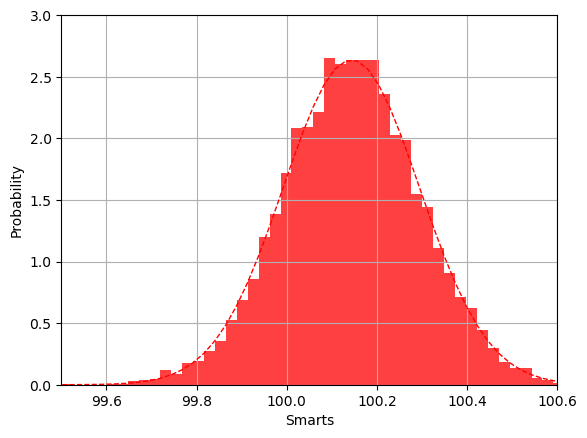

In [2]:
%matplotlib inline


%matplotlib inline

from numpy import *
from numpy.random import randint, randn
from time import time
from scipy.stats import norm
import matplotlib.pyplot as plt

# Returns mean of bootstrap samples                                                                                                                                                
def stat(data):
    return mean(data)

# Bootstrap algorithm                                                                                                                                                              
def bootstrap(data, statistic, R):
    t = zeros(R); n = len(data); inds = arange(n); t0 = time()

    # non-parametric bootstrap                                                                                                                                                     
    for i in range(R):
        t[i] = statistic(data[randint(0,n,n)])

    # analysis                                                                                                                                                                     
    print("Runtime: %g sec" % (time()-t0)); print("Bootstrap Statistics :")
    print("original           bias      std. error")
    print("%8g %8g %14g %15g" % (statistic(data), std(data),\
                             mean(t), \
                             std(t)))
    return t


mu, sigma = 100, 15
datapoints = 10000
x = mu + sigma*random.randn(datapoints)
# bootstrap returns the data sample                                                                                                          t = bootstrap(x, stat, datapoints)
# the histogram of the bootstrapped  data  
t = bootstrap(x, stat, datapoints)
# the histogram of the bootstrapped  data                                            
n, binsboot, patches = plt.hist(t, bins=50, density='true',histtype='bar', color='red', alpha=0.75)

# add a 'best fit' line                                                                                                                                                          
y = norm.pdf( binsboot, mean(t), std(t))
lt = plt.plot(binsboot, y, 'r--', linewidth=1)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.axis([99.5, 100.6, 0, 3.0])
plt.grid(True)

plt.show()

## Resampling methods: Blocking

The blocking method was made popular by [Flyvbjerg and Pedersen (1989)](https://aip.scitation.org/doi/10.1063/1.457480)
and has become one of the standard ways to estimate
$V(\widehat{\theta})$ for exactly one $\widehat{\theta}$, namely
$\widehat{\theta} = \overline{X}$. 

Assume $n = 2^d$ for some integer $d>1$ and $X_1,X_2,\cdots, X_n$ is a stationary time series to begin with. 
Moreover, assume that the time series is asymptotically uncorrelated. We switch to vector notation by arranging $X_1,X_2,\cdots,X_n$ in an $n$-tuple. Define:

$$
\begin{align*}
\hat{X} = (X_1,X_2,\cdots,X_n).
\end{align*}
$$

The strength of the blocking method is when the number of
observations, $n$ is large. For large $n$, the complexity of dependent
bootstrapping scales poorly, but the blocking method does not,
moreover, it becomes more accurate the larger $n$ is.


## Blocking Transformations
 We now define
blocking transformations. The idea is to take the mean of subsequent
pair of elements from $\vec{X}$ and form a new vector
$\vec{X}_1$. Continuing in the same way by taking the mean of
subsequent pairs of elements of $\vec{X}_1$ we obtain $\vec{X}_2$, and
so on. 
Define $\vec{X}_i$ recursively by:

$$
(\vec{X}_0)_k \equiv (\vec{X})_k \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} 
(\vec{X}_{i+1})_k \equiv \frac{1}{2}\Big( (\vec{X}_i)_{2k-1} +
(\vec{X}_i)_{2k} \Big) \qquad \text{for all} \qquad 1 \leq i \leq d-1
\label{_auto2} \tag{5}
\end{equation}
$$

The quantity $\vec{X}_k$ is
subject to $k$ **blocking transformations**.  We now have $d$ vectors
$\vec{X}_0, \vec{X}_1,\cdots,\vec X_{d-1}$ containing the subsequent
averages of observations. It turns out that if the components of
$\vec{X}$ is a stationary time series, then the components of
$\vec{X}_i$ is a stationary time series for all $0 \leq i \leq d-1$

We can then compute the autocovariance, the variance, sample mean, and
number of observations for each $i$. 
Let $\gamma_i, \sigma_i^2,
\overline{X}_i$ denote the autocovariance, variance and average of the
elements of $\vec{X}_i$ and let $n_i$ be the number of elements of
$\vec{X}_i$. It follows by induction that $n_i = n/2^i$. 


## Blocking Transformations

Using the
definition of the blocking transformation and the distributive
property of the covariance, it is clear that since $h =|i-j|$
we can define

$$
\gamma_{k+1}(h) = cov\left( ({X}_{k+1})_{i}, ({X}_{k+1})_{j} \right) \nonumber
$$

$$
=  \frac{1}{4}cov\left( ({X}_{k})_{2i-1} + ({X}_{k})_{2i}, ({X}_{k})_{2j-1} + ({X}_{k})_{2j} \right) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation} 
=  \frac{1}{2}\gamma_{k}(2h) + \frac{1}{2}\gamma_k(2h+1) \hspace{0.1cm} \mathrm{h = 0} 
\label{_auto3} \tag{6}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation} 
=\frac{1}{4}\gamma_k(2h-1) + \frac{1}{2}\gamma_k(2h) + \frac{1}{4}\gamma_k(2h+1) \quad \mathrm{else}
\label{_auto4} \tag{7}
\end{equation}
$$

The quantity $\hat{X}$ is asymptotic uncorrelated by assumption, $\hat{X}_k$ is also asymptotic uncorrelated. Let's turn our attention to the variance of the sample mean $V(\overline{X})$. 


## Blocking Transformations, getting there
We have

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
V(\overline{X}_k) = \frac{\sigma_k^2}{n_k} + \underbrace{\frac{2}{n_k} \sum_{h=1}^{n_k-1}\left( 1 - \frac{h}{n_k} \right)\gamma_k(h)}_{\equiv e_k} = \frac{\sigma^2_k}{n_k} + e_k \quad \text{if} \quad \gamma_k(0) = \sigma_k^2. 
\label{_auto5} \tag{8}
\end{equation}
$$

The term $e_k$ is called the **truncation error**:

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
e_k = \frac{2}{n_k} \sum_{h=1}^{n_k-1}\left( 1 - \frac{h}{n_k} \right)\gamma_k(h). 
\label{_auto6} \tag{9}
\end{equation}
$$

We can show that $V(\overline{X}_i) = V(\overline{X}_j)$ for all $0 \leq i \leq d-1$ and $0 \leq j \leq d-1$. 


## Blocking Transformations, final expressions

We can then wrap up

$$
n_{j+1} \overline{X}_{j+1}  = \sum_{i=1}^{n_{j+1}} (\hat{X}_{j+1})_i =  \frac{1}{2}\sum_{i=1}^{n_{j}/2} (\hat{X}_{j})_{2i-1} + (\hat{X}_{j})_{2i} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation} 
= \frac{1}{2}\left[ (\hat{X}_j)_1 + (\hat{X}_j)_2 + \cdots + (\hat{X}_j)_{n_j} \right] = \underbrace{\frac{n_j}{2}}_{=n_{j+1}} \overline{X}_j = n_{j+1}\overline{X}_j. 
\label{_auto7} \tag{10}
\end{equation}
$$

By repeated use of this equation we get $V(\overline{X}_i) = V(\overline{X}_0) = V(\overline{X})$ for all $0 \leq i \leq d-1$. This has the consequence that

<!-- Equation labels as ordinary links -->
<div id="eq:convergence"></div>

$$
\begin{equation}
V(\overline{X}) = \frac{\sigma_k^2}{n_k} + e_k \qquad \text{for all} \qquad 0 \leq k \leq d-1. \label{eq:convergence} \tag{11}
\end{equation}
$$

Flyvbjerg and Petersen demonstrated that the sequence
$\{e_k\}_{k=0}^{d-1}$ is decreasing, and conjecture that the term
$e_k$ can be made as small as we would like by making $k$ (and hence
$d$) sufficiently large. The sequence is decreasing (Master of Science thesis by Marius Jonsson, UiO 2018).
It means we can apply blocking transformations until
$e_k$ is sufficiently small, and then estimate $V(\overline{X})$ by
$\widehat{\sigma}^2_k/n_k$. 


For an elegant solution and proof of the blocking method, see the recent article of [Marius Jonsson (former MSc student of the Computational Physics group)](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.98.043304).